In [3]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','nature', 'no-latex'])

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
sim_dir = "/home/adarsh.subbaswamy/AFISP/simulation/out"
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(sim_dir) if isfile(join(sim_dir, f))]

In [5]:
n_samples = []
method= []
dim = []
iter = []
runtimes = []

for f in onlyfiles:
    rtimes = np.loadtxt(join(sim_dir, f))

    num_reps = len(rtimes)

    nsamp_, dim_, _ = f.split('_')[-3:]
    mname = f.split('_')[0]
    for i in range(num_reps):
        n_samples.append(int(nsamp_))
        method.append(mname)
        dim.append(int(dim_))
        iter.append(i)
        runtimes.append(rtimes[i]/60.)

In [6]:
runtime_df = pd.DataFrame({ 'Method' : method,
                            'N' : n_samples,
                            'Dimensionality' : dim,
                            'Repetition' : iter,
                            'Runtime' : runtimes })

In [7]:
dim_run_df = runtime_df.query("N == 10000")[['Method', 'Dimensionality', 'Runtime']].groupby(["Method", "Dimensionality"]).mean()

In [8]:
# dim_run_plot.save("fig/runtime_vs_dim.png", dpi=360)

In [9]:
dim_run_se = runtime_df.query("N == 10000")[['Method', 'Dimensionality', 'Runtime']].groupby(["Method", "Dimensionality"]).sem()

In [10]:
adim = dim_run_df.query('Method == "afisp"').reset_index()['Dimensionality']
arun = dim_run_df.query('Method == "afisp"').reset_index()['Runtime']
ase = dim_run_se.query('Method == "afisp"').reset_index()['Runtime']

sdim = dim_run_df.query('Method == "slicefinder"').reset_index()['Dimensionality']
srun = dim_run_df.query('Method == "slicefinder"').reset_index()['Runtime']
sse = dim_run_se.query('Method == "slicefinder"').reset_index()['Runtime']

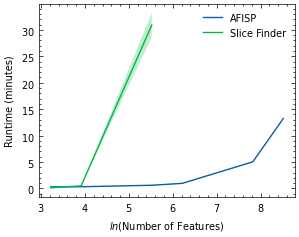

In [12]:
plt.plot(np.log(adim) + np.log(5), arun, label="AFISP")
plt.fill_between(np.log(adim) + np.log(5), arun - ase, arun + ase, alpha=0.25)

plt.plot(np.log(sdim)+np.log(5), srun, label="Slice Finder")
plt.fill_between(np.log(sdim)+np.log(5), srun - sse, srun + sse, alpha=0.25)
plt.xlabel("$ln$(Number of Features)")
plt.ylabel("Runtime (minutes)")
plt.legend(loc='best')
plt.savefig('fig/runtime_vs_dim.pdf', dpi=360)

In [9]:
n_run_df = runtime_df.query("Dimensionality == 10")[['Method', 'N', 'Runtime']].groupby(["Method", "N"]).mean()

In [10]:
n_run_se = runtime_df.query("Dimensionality == 10")[['Method', 'N', 'Runtime']].groupby(["Method", "N"]).sem()

In [11]:
an = n_run_df.query('Method == "afisp"').reset_index()['N']
arun = n_run_df.query('Method == "afisp"').reset_index()['Runtime']
ase = n_run_se.query('Method == "afisp"').reset_index()['Runtime']

sn = n_run_df.query('Method == "slicefinder"').reset_index()['N']
srun = n_run_df.query('Method == "slicefinder"').reset_index()['Runtime']
sse = n_run_se.query('Method == "slicefinder"').reset_index()['Runtime']

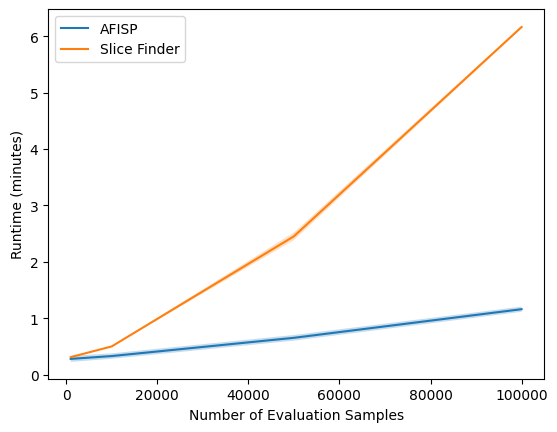

In [12]:
plt.plot(an, arun, label="AFISP")
plt.fill_between(an, arun-ase, arun+ase, alpha=0.25)
plt.plot(sn, srun, label="Slice Finder")
plt.fill_between(sn, srun-sse, srun+sse, alpha=0.25)

plt.xlabel("Number of Evaluation Samples")
plt.ylabel("Runtime (minutes)")
plt.legend(loc='best')
plt.savefig('fig/runtime_vs_N.png', dpi=360)